# Data Preprocessing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import warnings
warnings.filterwarnings('ignore')

In [2]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [6]:
type(x_train)

numpy.ndarray

In [7]:
print('Training Data Shape    : ', x_train.shape)
print('Training Labels  Shape : ', y_train.shape)
print('Testing Data Shape     : ', x_test.shape)
print('Testing Labels Shape   : ', y_test.shape)

Training Data Shape    :  (50000, 32, 32, 3)
Training Labels  Shape :  (50000, 1)
Testing Data Shape     :  (10000, 32, 32, 3)
Testing Labels Shape   :  (10000, 1)


# Explorative Data Analysis

(-0.5, 31.5, 31.5, -0.5)

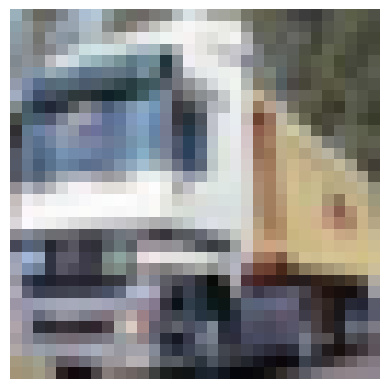

In [8]:
plt.imshow(x_train[1])
plt.axis('off')

array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]], dtype=uint8)
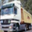

In [9]:
x_train[1]

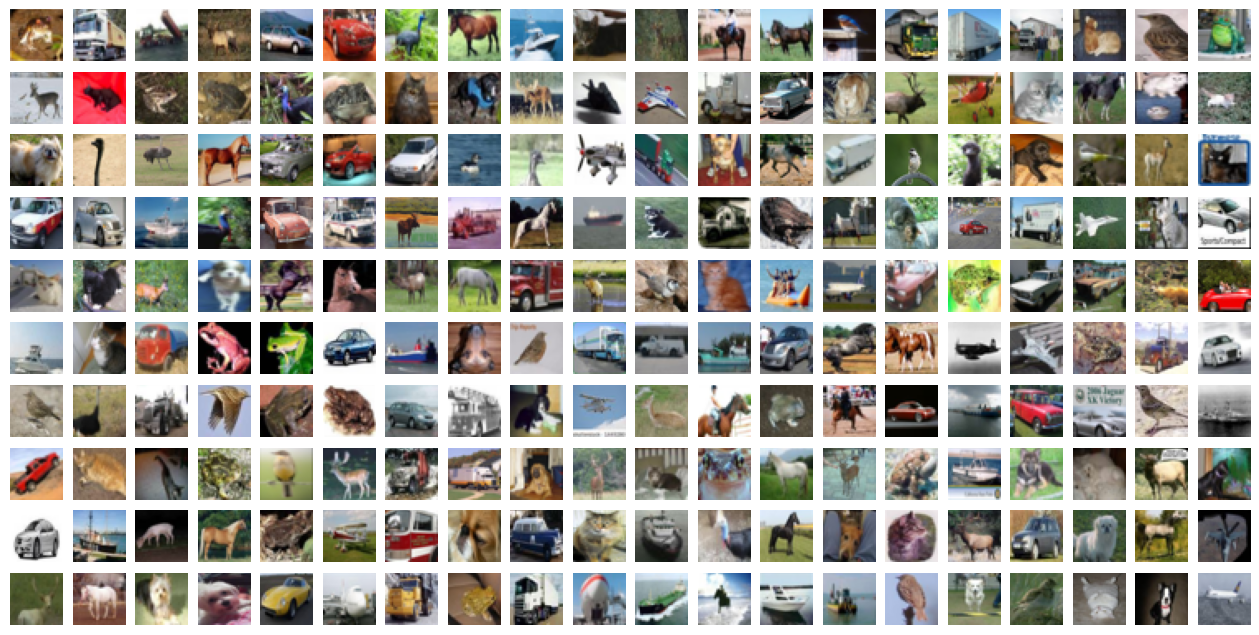

In [10]:
plt.figure(figsize = (16,8))
for i in range(200):
  plt.subplot(10,20, i+1)
  plt.imshow(x_train[i])
  plt.axis('off')

In [11]:
x_train = x_train/255
x_test  = x_test/255

In [12]:
y_train[:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [13]:
# Encoding the labels
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes = 10)
y_test  = to_categorical(y_test, num_classes = 10)

In [14]:
print('Training Data Shape    : ', x_train.shape)
print('Training Labels  Shape : ', y_train.shape)
print('Testing Data Shape     : ', x_test.shape)
print('Testing Labels Shape   : ', y_test.shape)

Training Data Shape    :  (50000, 32, 32, 3)
Training Labels  Shape :  (50000, 10)
Testing Data Shape     :  (10000, 32, 32, 3)
Testing Labels Shape   :  (10000, 10)


# Create and Train Artificial Neural Network


In [15]:
model = tf.keras.models.Sequential()
model.add(Flatten(input_shape = (32, 32, 3)))
model.add(Dense(200, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 200)               614600    
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 635710 (2.43 MB)
Trainable params: 635710 (2.43 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
# Compile the model
model.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(),
              metrics = ['accuracy'])

In [17]:
history = model.fit(
    x_train,
    y_train,
    validation_data = (x_test, y_test),
    epochs = 100,
    batch_size = 1000,
    verbose = 1
)

Epoch 1/100
50/50 [==============================] - 5s 50ms/step - loss: 2.2091 - accuracy: 0.2023 - val_loss: 2.1317 - val_accuracy: 0.2383
Epoch 2/100
50/50 [==============================] - 1s 26ms/step - loss: 2.0814 - accuracy: 0.2664 - val_loss: 2.0413 - val_accuracy: 0.2863
Epoch 3/100
50/50 [==============================] - 1s 20ms/step - loss: 2.0100 - accuracy: 0.2945 - val_loss: 1.9859 - val_accuracy: 0.3052
Epoch 4/100
50/50 [==============================] - 1s 16ms/step - loss: 1.9632 - accuracy: 0.3128 - val_loss: 1.9470 - val_accuracy: 0.3206
Epoch 5/100
50/50 [==============================] - 1s 15ms/step - loss: 1.9297 - accuracy: 0.3253 - val_loss: 1.9184 - val_accuracy: 0.3319
Epoch 6/100
50/50 [==============================] - 1s 11ms/step - loss: 1.9024 - accuracy: 0.3351 - val_loss: 1.8933 - val_accuracy: 0.3407
Epoch 7/100
50/50 [==============================] - 1s 12ms/step - loss: 1.8811 - accuracy: 0.3440 - val_loss: 1.8725 - val_accuracy: 0.3516
Epoch 

## Visualizing the training journey

In [18]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [19]:
acc_train = history.history['accuracy']
acc_val   = history.history['val_accuracy']

loss_train = history.history['loss']
loss_val   = history.history['val_loss']

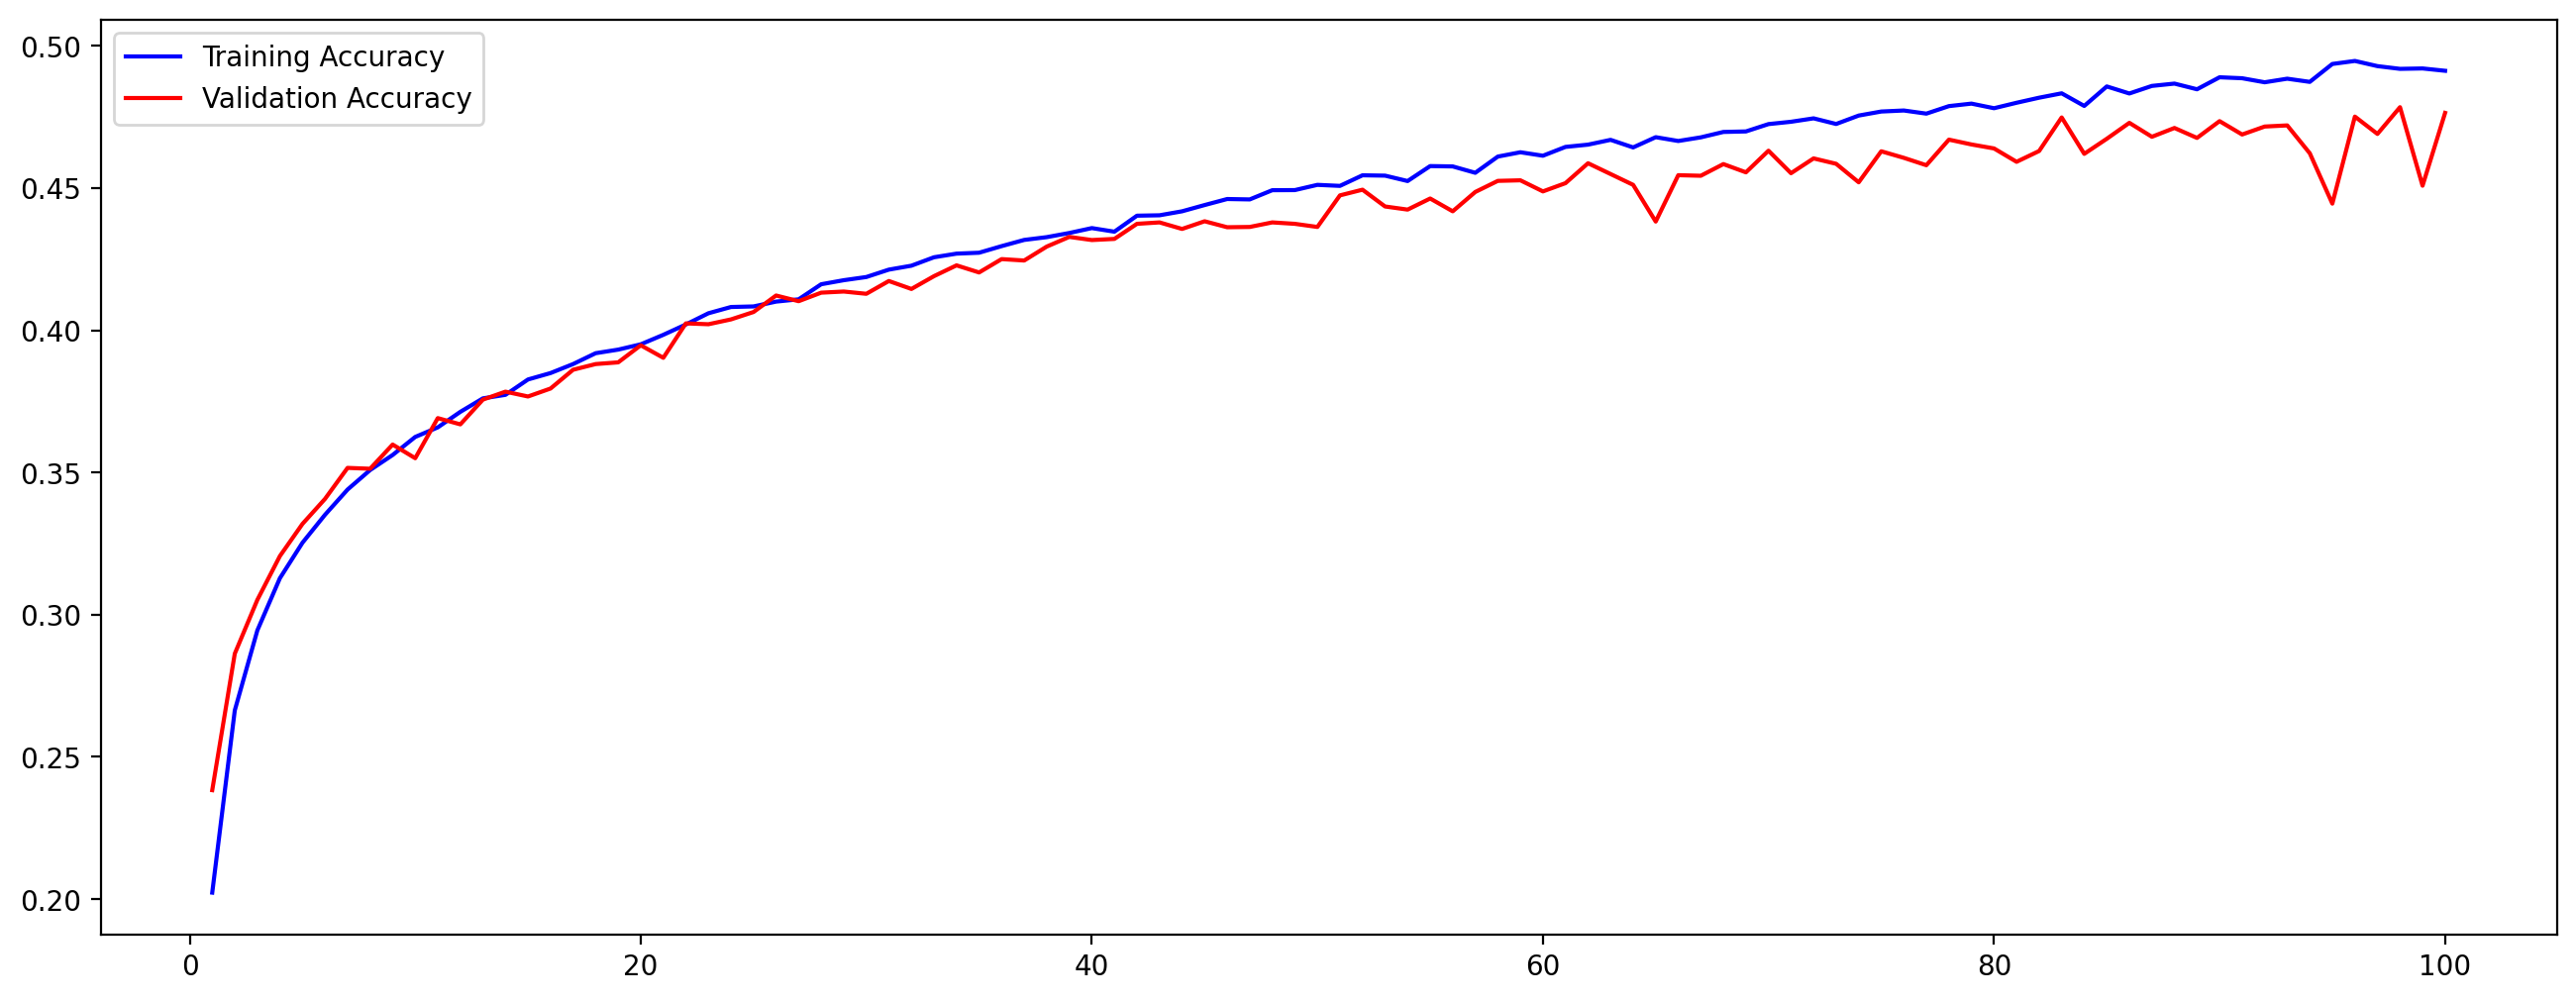

In [20]:
num_epochs = range(1,101)
plt.figure(figsize = (16,6), dpi = 200)
plt.plot(num_epochs, acc_train, c = 'blue', label = 'Training Accuracy')
plt.plot(num_epochs, acc_val, c = 'red', label = 'Validation Accuracy')
plt.legend()

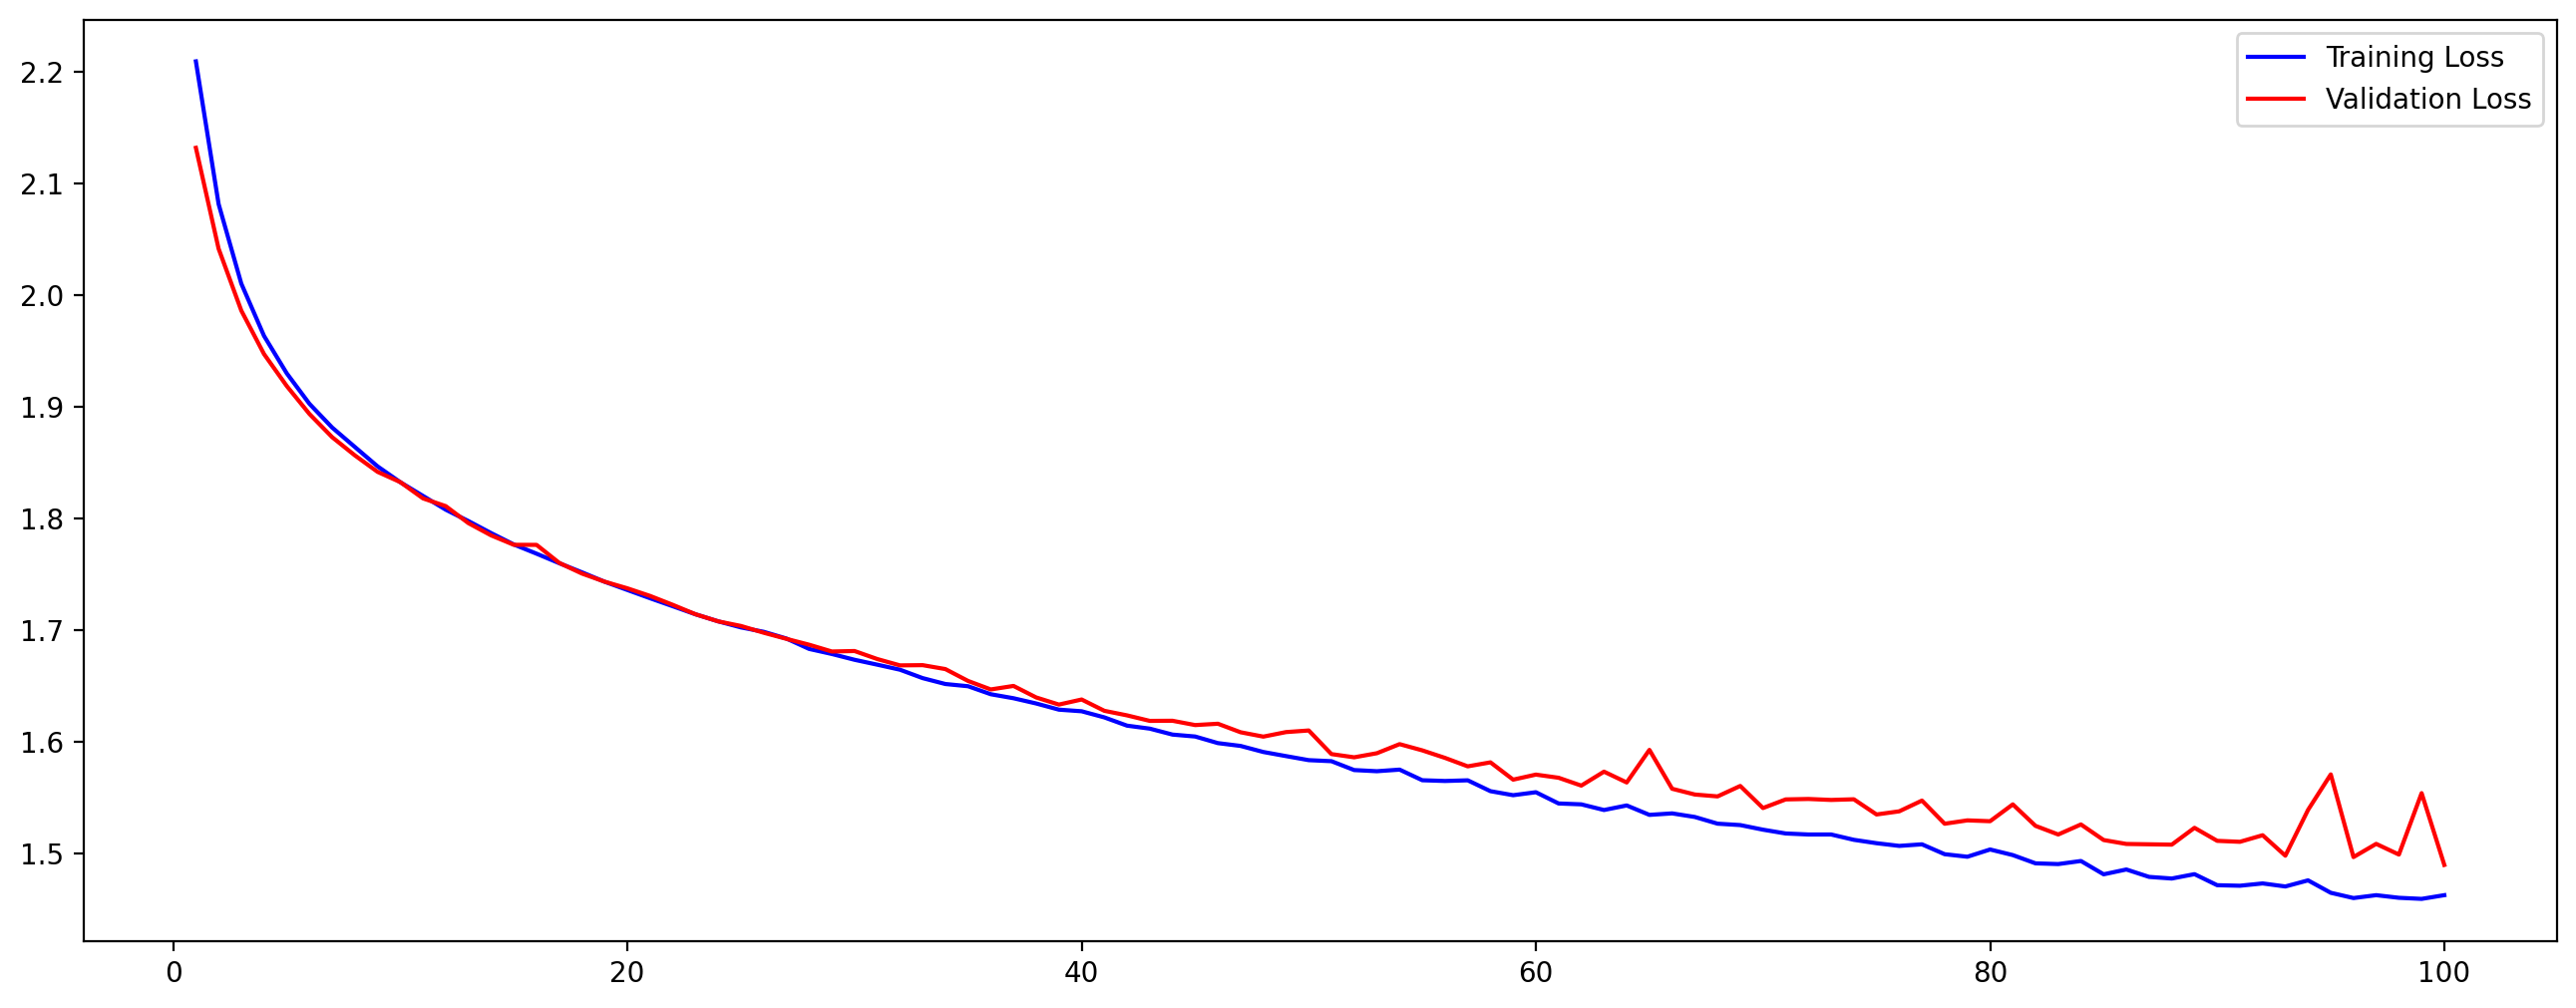

In [21]:
num_epochs = range(1,101)
plt.figure(figsize = (16,6), dpi = 200)
plt.plot(num_epochs, loss_train, c = 'blue', label = 'Training Loss')
plt.plot(num_epochs, loss_val, c = 'red', label = 'Validation Loss')
plt.legend()

# Making Predictions

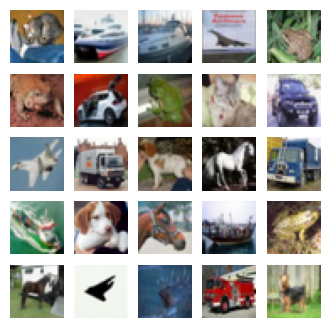

In [22]:
plt.figure(figsize = (4,4))
for i in range(25):
  plt.subplot(5,5, i+1)
  plt.imshow(x_test[i], cmap = 'gray')
  plt.axis('off')